# Assignment-4 Employee Attrition dataset _ 22nd Spept 2023

## Vijayanagara Sharanya,21bce8002, VITAP Campus

steps to be performed
1. import the data
2. data preprocessing
3. outliers detection and handling them
4. split into dep and independent variables
5. model building using logistic regression and decison tree classifier and random forest
6. perform calculation of metrics


### import all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### import the dataset

In [2]:
df = pd.read_csv("Employee-Attrition.csv")

In [3]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### data preprocessing

In [5]:
df.info

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [6]:
df.shape

(1470, 35)

In [7]:
df.size

51450

In [8]:
df.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [9]:
#check for null values #no null values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
#check the corr
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_4652\1357783118.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<Axes: >

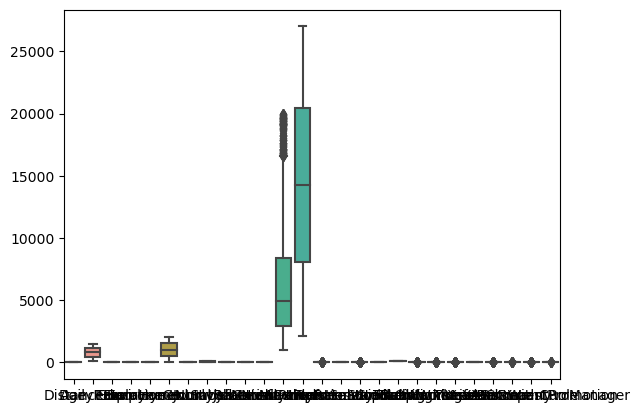

In [11]:
#check for outliers
sns.boxplot(df) # we can see some outliers


handle the outliers
1. removal of outliers
2. replace them with mean median mode
*  mean - numerical
* mode - categorical

we found out outliers are there for following columns
1. total working years 
2. TrainingTimesLastYear
3. YearsAtCompany
4. YearsInCurrentRole
5. YearsSinceLastPromotion
6. YearsWithCurrManager

#### handling outlier for totalworkingyears column

<Axes: >

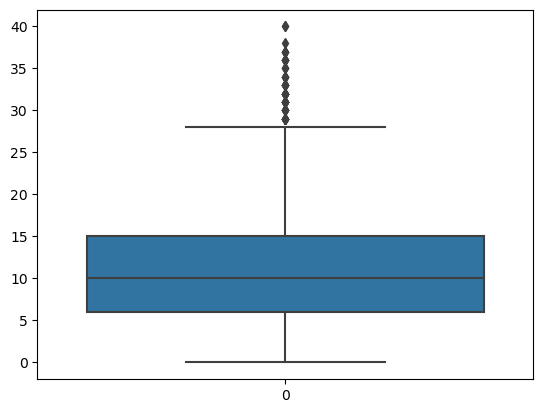

In [12]:
sns.boxplot(df.TotalWorkingYears)

In [13]:
Q1 = df.TotalWorkingYears.quantile(0.25)
Q3 = df.TotalWorkingYears.quantile(0.75)

In [14]:
print(Q1,Q3)

6.0 15.0


In [15]:
IQR = Q3-Q1
IQR

9.0

In [16]:
upper_limit = Q3 + 1.5*IQR
upper_limit

28.5

In [17]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-7.5

In [18]:
df.median()

C:\Users\HP\AppData\Local\Temp\ipykernel_4652\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                            36.0
DailyRate                     802.0
DistanceFromHome                7.0
Education                       3.0
EmployeeCount                   1.0
EmployeeNumber               1020.5
EnvironmentSatisfaction         3.0
HourlyRate                     66.0
JobInvolvement                  3.0
JobLevel                        2.0
JobSatisfaction                 3.0
MonthlyIncome                4919.0
MonthlyRate                 14235.5
NumCompaniesWorked              2.0
PercentSalaryHike              14.0
PerformanceRating               3.0
RelationshipSatisfaction        3.0
StandardHours                  80.0
StockOptionLevel                1.0
TotalWorkingYears              10.0
TrainingTimesLastYear           3.0
WorkLifeBalance                 3.0
YearsAtCompany                  5.0
YearsInCurrentRole              3.0
YearsSinceLastPromotion         1.0
YearsWithCurrManager            3.0
dtype: float64

In [19]:
df['TotalWorkingYears'] =np.where(df['TotalWorkingYears']>upper_limit,10.0,df['TotalWorkingYears'])

<Axes: >

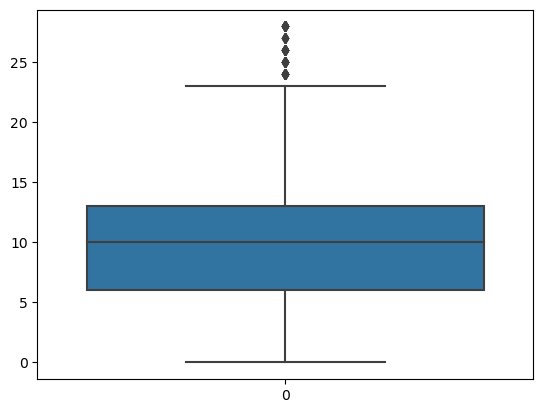

In [20]:
sns.boxplot(df.TotalWorkingYears)

#### handling outlier for TrainingTimesLastYear column

<Axes: >

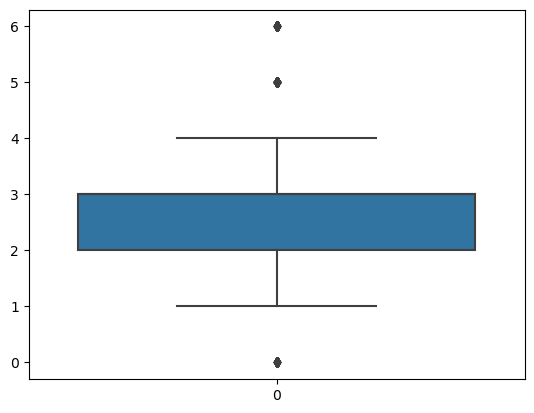

In [21]:
sns.boxplot(df.TrainingTimesLastYear)

In [22]:
Q1 = df.TrainingTimesLastYear.quantile(0.25)
Q3 = df.TrainingTimesLastYear.quantile(0.75)

In [23]:
Q1,Q3

(2.0, 3.0)

In [24]:
IQR = Q3-Q1
IQR

1.0

In [25]:
upper_limit = Q3 + 1.5*IQR
upper_limit

4.5

In [26]:
lower_limit = Q1 - 1.5*IQR
lower_limit

0.5

In [27]:
df['TrainingTimesLastYear'] =np.where(df['TrainingTimesLastYear']>upper_limit,3.0,df['TrainingTimesLastYear'])

<Axes: >

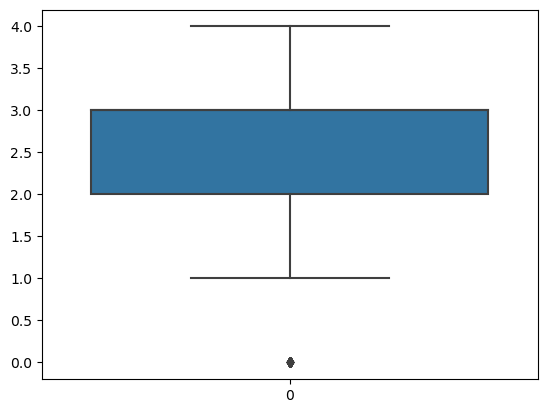

In [28]:
sns.boxplot(df.TrainingTimesLastYear)

#### handling outliers for YearsAtCompany column

In [29]:
Q1 = df.YearsAtCompany.quantile(0.25)
Q3 = df.YearsAtCompany.quantile(0.75)


In [30]:
Q1,Q3

(3.0, 9.0)

In [31]:
IQR = Q3-Q1
IQR

6.0

In [32]:
upper_limit = Q3 + 1.5*IQR
upper_limit

18.0

In [33]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-6.0

In [34]:
df['YearsAtCompany'] =np.where(df['YearsAtCompany']>upper_limit,5.0,df['YearsAtCompany'])

<Axes: >

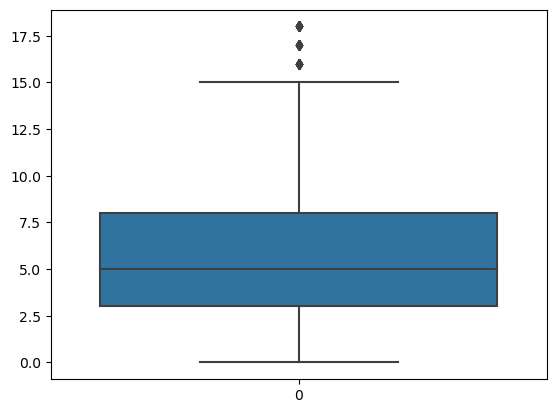

In [35]:
sns.boxplot(df.YearsAtCompany)

#### handling outliers for YearsInCurrentRole column

In [36]:
Q1 = df.YearsInCurrentRole.quantile(0.25)
Q3 = df.YearsInCurrentRole.quantile(0.75)

In [37]:
Q1,Q3

(2.0, 7.0)

In [38]:
IQR = Q3-Q1
IQR

5.0

In [39]:
upper_limit = Q3 + 1.5*IQR
upper_limit

14.5

In [40]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-5.5

In [41]:
df['YearsInCurrentRole'] =np.where(df['YearsInCurrentRole']>upper_limit,3.0,df['YearsInCurrentRole'])

<Axes: >

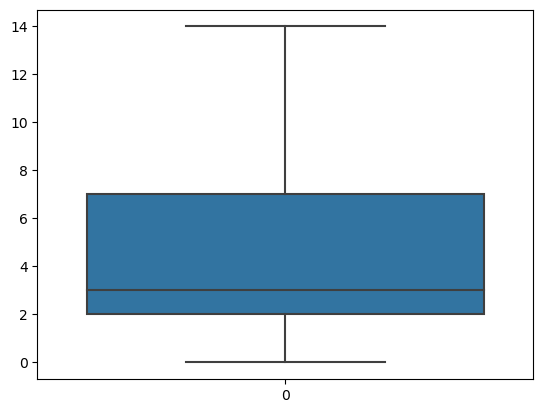

In [42]:
sns.boxplot(df.YearsInCurrentRole)

#### handling outliers for YearsSinceLastPromotion column 

In [43]:
Q1 = df.YearsSinceLastPromotion.quantile(0.25)
Q3 = df.YearsSinceLastPromotion.quantile(0.75)

In [44]:
Q1,Q3

(0.0, 3.0)

In [45]:
IQR = Q3-Q1
IQR

3.0

In [46]:
upper_limit = Q3 + 1.5*IQR
upper_limit

7.5

In [47]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-4.5

In [48]:
df['YearsSinceLastPromotion'] =np.where(df['YearsSinceLastPromotion']>upper_limit,1.0,df['YearsSinceLastPromotion'])

<Axes: >

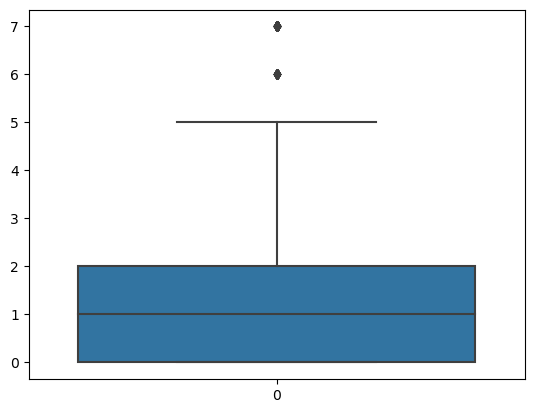

In [49]:
sns.boxplot(df.YearsSinceLastPromotion)

#### handling outliers in YearsWithCurrManager column

In [50]:
Q1 = df.YearsWithCurrManager.quantile(0.25)
Q3 = df.YearsWithCurrManager.quantile(0.75)

In [51]:
Q1,Q3

(2.0, 7.0)

In [52]:
IQR = Q3-Q1
IQR

5.0

In [53]:
upper_limit = Q3 + 1.5*IQR
upper_limit

14.5

In [54]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-5.5

In [55]:
df['YearsWithCurrManager'] =np.where(df['YearsWithCurrManager']>upper_limit,3.0,df['YearsWithCurrManager'])

<Axes: >

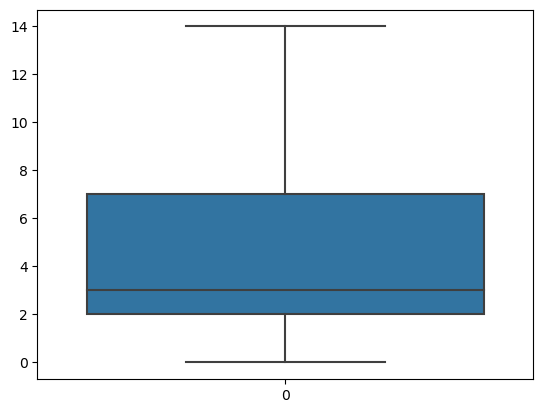

In [56]:
sns.boxplot(df.YearsWithCurrManager)

<Axes: >

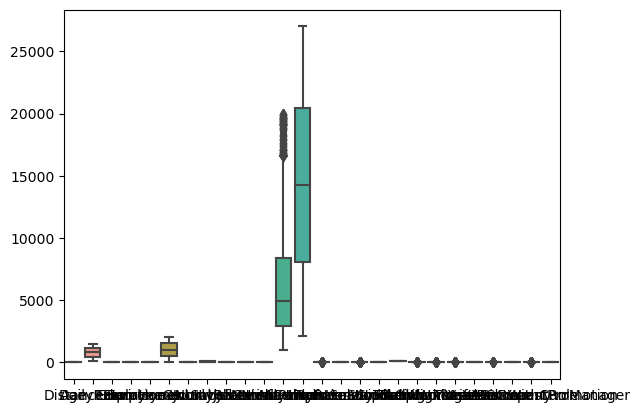

In [57]:
#we have removed all the outliers, so once again lets check for any left outliers
sns.boxplot(df)

In [58]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0


### split into dep and independent variables

In [59]:
x = df.iloc[:,2:35]
y = df.iloc[:,1:2]

In [60]:
x.head(2)

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0


In [61]:
y = df.Attrition

In [62]:
y.head(2)

0    Yes
1     No
Name: Attrition, dtype: object

In [63]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [64]:
#encode department column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
x['Department'] = le.fit_transform(x['Department'])

In [66]:
x['Department']

0       2
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    2
1469    1
Name: Department, Length: 1470, dtype: int32

In [67]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0


In [68]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [69]:
x['EducationField'] = le.fit_transform(x['EducationField'])

In [70]:
x['EducationField']

0       1
1       1
2       4
3       1
4       3
       ..
1465    3
1466    3
1467    1
1468    3
1469    3
Name: EducationField, Length: 1470, dtype: int32

In [71]:
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,2,1,2,1,1,1,2,Female,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,Travel_Frequently,279,1,8,1,1,1,2,3,Male,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,Travel_Rarely,1373,1,2,2,4,1,4,4,Male,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,Travel_Frequently,1392,1,3,4,1,1,5,4,Female,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,Travel_Rarely,591,1,2,1,3,1,7,1,Male,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Gender=le.fit_transform(x.Gender)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,Travel_Frequently,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,Travel_Rarely,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,Travel_Frequently,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,Travel_Rarely,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.BusinessTravel=le.fit_transform(x.BusinessTravel)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.JobRole=le.fit_transform(x.JobRole)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [75]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [76]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.MaritalStatus=le.fit_transform(x.MaritalStatus)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [78]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.Over18=le.fit_transform(x.Over18)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [80]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.OverTime=le.fit_transform(x.OverTime)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [82]:
df['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.PercentSalaryHike=le.fit_transform(x.PercentSalaryHike)
x.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [84]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x.PerformanceRatinge=le.fit_transform(x.PerformanceRating)
x.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_4652\2820111470.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.PerformanceRatinge=le.fit_transform(x.PerformanceRating)


,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,1102,2,1,2,1,1,1,2,0,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,1,279,1,8,1,1,1,2,3,1,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,2,1373,1,2,2,4,1,4,4,1,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,1,1392,1,3,4,1,1,5,4,0,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,2,591,1,2,1,3,1,7,1,1,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0


In [86]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

### Split the data into training and testing datasets

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 33), (294, 33), (1176,), (294,))

In [89]:
x_train.head()

,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1374,1.0,0.360057,1.0,0.714286,0.50,0.2,0.0,0.937107,1.000000,0.0,...,0.666667,0.0,0.333333,0.357143,0.50,0.333333,0.055556,0.000000,0.000000,0.000000
1092,1.0,0.607015,0.5,0.964286,0.50,1.0,0.0,0.747460,1.000000,1.0,...,1.000000,0.0,0.333333,0.285714,0.75,0.666667,0.277778,0.285714,0.000000,0.214286
768,1.0,0.141732,1.0,0.892857,0.50,0.4,0.0,0.515239,0.666667,1.0,...,0.333333,0.0,0.333333,0.285714,0.75,0.333333,0.388889,0.500000,1.000000,0.357143
569,0.0,0.953472,1.0,0.250000,0.75,0.2,0.0,0.381229,0.000000,1.0,...,0.333333,0.0,0.000000,0.357143,0.25,0.666667,0.555556,0.500000,0.000000,0.642857
911,0.5,0.355762,1.0,0.821429,0.00,0.2,0.0,0.615385,0.666667,1.0,...,1.000000,0.0,0.000000,0.035714,1.00,0.666667,0.055556,0.000000,0.142857,0.000000


### Model Building using Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [91]:
model.fit(x_train,y_train)

LogisticRegression()

In [92]:
pred=model.predict(x_test)

In [93]:
pred

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'N

In [94]:
y_test

442      No
1091     No
981     Yes
785      No
1332    Yes
       ... 
1439     No
481      No
124     Yes
198      No
1229     No
Name: Attrition, Length: 294, dtype: object

In [95]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9.0,3.0,3,7.0,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6.0,0.0,3,6.0,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17.0,3.0,2,9.0,6.0,0.0,8.0


In [96]:
# model.predict(ms.transform([[1,19,19000]]))

### Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [98]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [99]:
pred=dtc.predict(x_test)

In [100]:
pred

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [101]:
y_test

442      No
1091     No
981     Yes
785      No
1332    Yes
       ... 
1439     No
481      No
124     Yes
198      No
1229     No
Name: Attrition, Length: 294, dtype: object

In [102]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0.0,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3.0,3,0.0,0.0,0.0,0.0


In [103]:
#dtc.predict(ms.transform([[1,19,19000]]))

### evaluation of classification model

In [104]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [105]:
accuracy_score(y_test,pred)

0.7585034013605442

In [106]:
confusion_matrix(y_test,pred)

array([[211,  34],
       [ 37,  12]], dtype=int64)

In [107]:
pd.crosstab(y_test,pred)

col_0,No,Yes
Attrition,,
No,211,34
Yes,37,12


In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      0.86      0.86       245
         Yes       0.26      0.24      0.25        49

    accuracy                           0.76       294
   macro avg       0.56      0.55      0.55       294
weighted avg       0.75      0.76      0.76       294



In [109]:
# precision
# of all positive predictions how many are really positive
#when it predicts yes,how often it is correct

# precision = TP/(TP+FP)


In [110]:
# Recall
# of all real positive cases how many are predicted positive
#when it is acutally is yes ,how often does it predict yes

# Recall = TP/(FN+TP)

In [111]:
# F1 score

# 2*precision*Recall/(Precision+Recall)

### Roc- Auc curve 

In [112]:
probability=dtc.predict_proba(x_test)[:,1]

In [113]:
probability

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0.

In [114]:
# import numpy as np

# from sklearn.metrics import roc_curve

# # Pass the pos_label argument explicitly
# fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label='Yes')


In [115]:
# roc_curve
fpr,tpr,threshsholds = roc_curve(y_test,probability,pos_label='Yes')

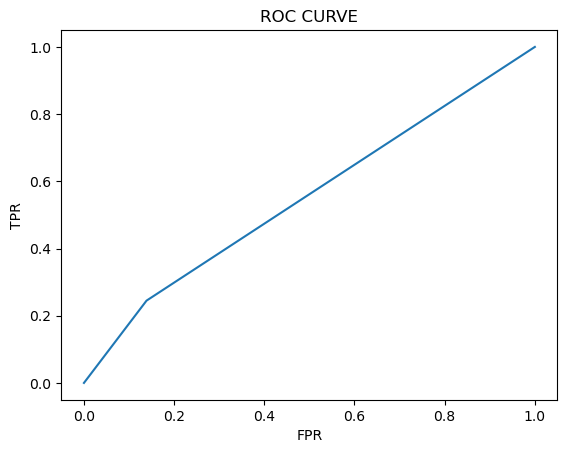

In [116]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# Hyper parameter tuning

[Text(0.3254081530448718, 0.96875, 'x[26] <= 0.054\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(0.07051282051282051, 0.90625, 'x[15] <= 0.75\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(0.041666666666666664, 0.84375, 'x[3] <= 0.554\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(0.02564102564102564, 0.78125, 'x[14] <= 0.167\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.01282051282051282, 0.71875, 'x[16] <= 0.057\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.00641025641025641, 0.65625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.019230769230769232, 0.65625, 'x[8] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.01282051282051282, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02564102564102564, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.038461538461538464, 0.71875, 'x[18] <= 0.056\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.03205128205128205, 0.65625, 'gini = 0.0\nsamples = 1\nv

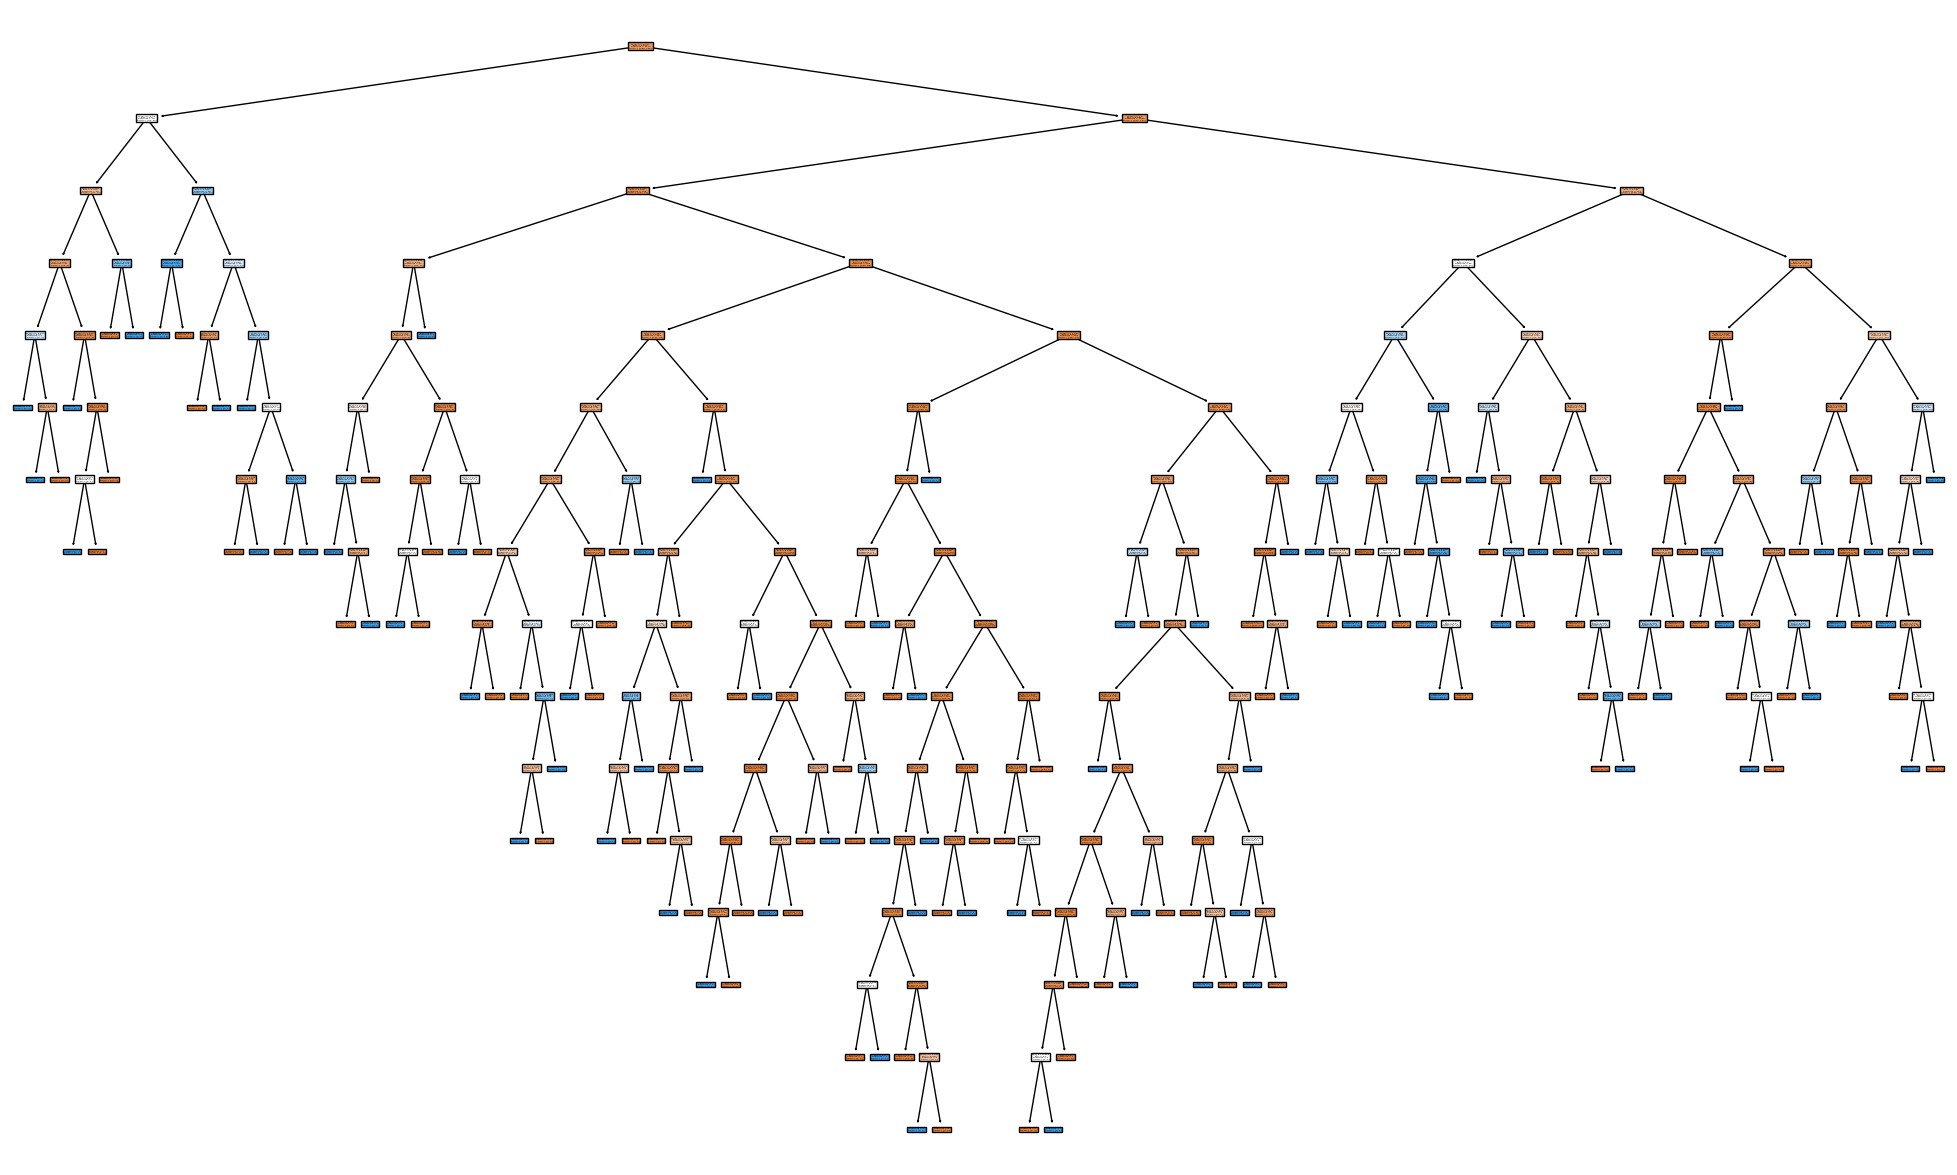

In [117]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [118]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [119]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [120]:
grid_search.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [121]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [122]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [123]:
pred=dtc_cv.predict(x_test)

In [124]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      1.00      0.92       245
         Yes       0.83      0.10      0.18        49

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.84      0.85      0.79       294



# Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [126]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [127]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [128]:
rfc_cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [129]:
pred=rfc_cv.predict(x_test)

In [130]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       245
         Yes       0.82      0.18      0.30        49

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



In [131]:
rfc_cv.best_params_

{'max_depth': 12, 'max_features': 9}